#### Vizualization Tool to Map field plot polygons

#### 1. Import Libraries

In [1]:
from visualizeGrid_v1 import read_bands,aoi_zoom,plot_grid,plot_bands
from mapField import makeGrid
import warnings
warnings.filterwarnings('ignore')

##### Import Red and NIR Orthomap Images
##### Define a name for the output NDVI band

In [1]:
out_img = 'Bands/BB2_NDVI.tif'
in_red =  'Bands/BB2_red.tif'
in_nir = 'Bands/BB2_nir.tif'

##### 2. Read in New NDVI map and copy the affine transform matrix

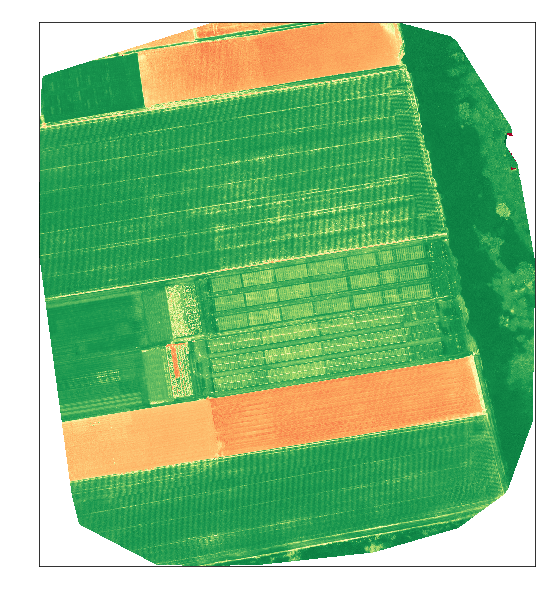

In [2]:
ndvi = read_bands(in_red,in_nir,out_img)   
affine = plot_bands(out_img)

##### 3. Define Area of Interest and zoom to that region
##### - aoi_zoom(minx,maxx,miny,maxy,ndvi)
##### - define the x and y extent points of the AOI

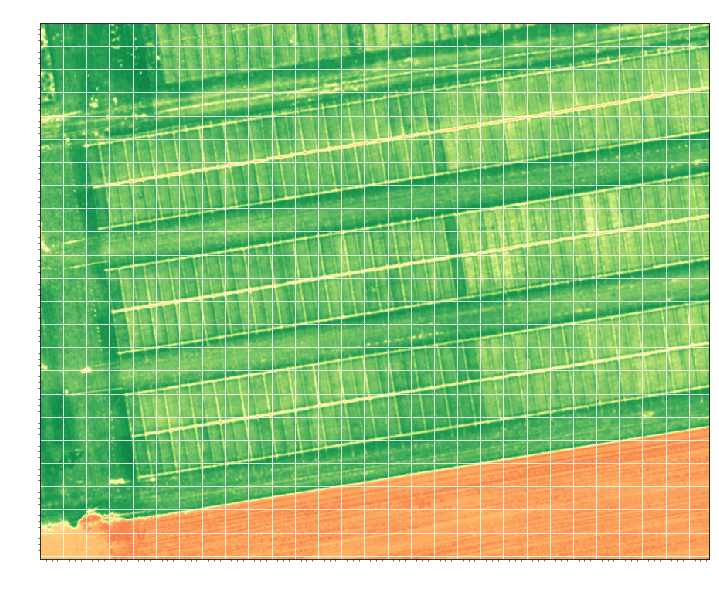

In [3]:
ndviz,minx,maxx,miny,maxy = aoi_zoom(1350,2200,2500,3180,ndvi)

#### 4. Define the Field Grid Dimensions and Location 
##### 'makeGrid' function takes arguments in the following order:
###### makeGrid(x,y,dx,dy,xo,yo,distance,angle,out_dest,index_name,in_csv):
###### x,y: x,y extend of grid
###### dx,dy - number of grid divisions in x and y
###### xo,yo - south east anchor point of the grid around which the grid is rotated
###### distance - buffer distance for grid plot polygons
###### angle - CCW angle of rotation of grid
###### out-dest - destination and name of output shapefile
###### in_csv - csv file used to assign grid polygons a unique ID
#### --
#### --
##### makeGrid returns a and grid as:
######  - polygon : translated and rotated multiPolygon 
######  - grid: translated and rotated multiLine grid

(1425.4100610109588, 2591.1529824450827, 1896.4267064522967, 3066.325897264195)


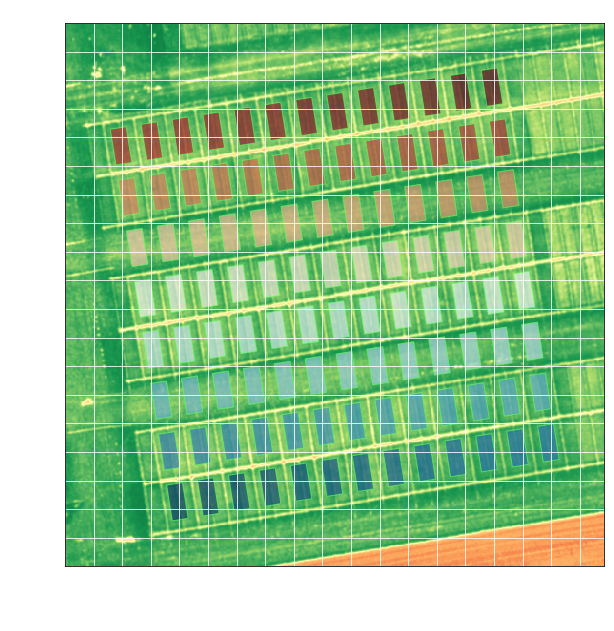

In [6]:
rows = 8
cols = 13
horizontal_extent = 432
vertical_extent = 427
angle = 81
inner_buffer = 8
anchor_horizontal = 1838
anchor_vertical = 2582
input_csv = 'test.csv'
out_put_file = 'BB2.geojson'
index_name = 'test_num'
apoly,poly = makeGrid(horizontal_extent,vertical_extent,rows,cols,
                      anchor_horizontal,anchor_vertical,inner_buffer,
                      angle,affine,out_put_file,index_name,input_csv)
plot_grid(poly,ndvi)

#### 5. Write the polygons to a raster shape file

In [ ]:
write_shapes(apoly,agrid,out_dest,index_name,data)